# Setup: Import Libraries and Define Paths


In [70]:
import os
import pandas as pd
from getpass import getuser
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:

# Automatically set the user
user = getuser()

# Set working directory
folder_path = f"C:/Users/{user}/Documents/GitHub/false_start_2/data/out"
os.chdir(folder_path)

# Load the data.xlsx file
file_name = "df.xlsx"
file_path = os.path.join(folder_path, file_name)
df = pd.read_excel(file_path)

# Load the data.xlsx file
file_name = "df_finalists.xlsx"
file_path = os.path.join(folder_path, file_name)
df_finalists = pd.read_excel(file_path)

In [72]:
# Count the number of missing values in the 'reactiontime' column
missing_count = df['reactiontime_ms'].isnull().sum()

# Print the result
print(f"Number of missing values in 'reactiontime': {missing_count}")


Number of missing values in 'reactiontime': 121


# Data Filtring


In [73]:
# Filter for 100m
df_hm = df[df['discipline'] == '100m']

# Filter for 100m men
df_hm_men = df[(df['discipline'] == '100m') & (df['men'] == 1)]
df_hm_men_finalists = df_finalists[(df_finalists['discipline'] == '100m') & (df_finalists['men'] == 1)]

# Filter for 100m women
df_hm_women = df[(df['discipline'] == '100m') & (df['men'] == 0)]
df_hm_women_finalists = df_finalists[(df_finalists['discipline'] == '100m') & (df_finalists['men'] == 0)]


## missing values

In [74]:
# Specify the columns to check for missing values
columns_to_check = [
    "reactiontime_ms", "age_at_event", "finishingtime", 
    "semi", "final", "rule", "wind", "country", "lane"
]

# Count missing values for each column of interest
missing_values = df_hm[columns_to_check].isna().sum()
print("Missing values per column:")
display(missing_values)

# Create indicator columns for missing values in each variable
for col in columns_to_check:
    df_hm[f"{col}_missing"] = df_hm[col].isna()

# Count the number of missing values in each row for the specified columns
df_hm['missing_count'] = df_hm[[f"{col}_missing" for col in columns_to_check]].sum(axis=1)

# Filter rows with more than one missing value
observations_with_multiple_missing = df_hm.loc[df_hm['missing_count'] > 1, columns_to_check + [f"{col}_missing" for col in columns_to_check] + ['missing_count']]

if not observations_with_multiple_missing.empty:
    print("Observations with more than one missing value:")
    display(observations_with_multiple_missing)
else:
    print("No observations with more than one missing value.")

# Clean up the temporary columns after the analysis
df_hm = df_hm.drop(columns=[f"{col}_missing" for col in columns_to_check] + ['missing_count'])
# Remove observations with missing values in any of the specified columns
# df = df.dropna(subset=columns_to_check)


Missing values per column:


reactiontime_ms     65
age_at_event        29
finishingtime      109
semi                 0
final                0
rule                 0
wind                39
country              0
lane                 0
dtype: int64

Observations with more than one missing value:


C:\Users\aldi\AppData\Local\Temp\ipykernel_9128\1617271785.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hm[f"{col}_missing"] = df_hm[col].isna()
C:\Users\aldi\AppData\Local\Temp\ipykernel_9128\1617271785.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hm[f"{col}_missing"] = df_hm[col].isna()
C:\Users\aldi\AppData\Local\Temp\ipykernel_9128\1617271785.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,reactiontime_ms,age_at_event,finishingtime,semi,final,rule,wind,country,lane,reactiontime_ms_missing,age_at_event_missing,finishingtime_missing,semi_missing,final_missing,rule_missing,wind_missing,country_missing,lane_missing,missing_count
91,NaN,31.0,NaN,0,0,rule 2,1.7,KSA,3,True,False,True,False,False,False,False,False,False,2
102,NaN,28.0,NaN,0,0,rule 1,-0.9,BAN,1,True,False,True,False,False,False,False,False,False,2
117,NaN,25.0,NaN,0,0,rule 3,0.4,SUD,3,True,False,True,False,False,False,False,False,False,2
139,NaN,33.0,NaN,0,0,rule 2,-0.1,MEX,3,True,False,True,False,False,False,False,False,False,2
284,NaN,NaN,18.37,0,0,rule 2,-0.2,AFG,2,True,True,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,NaN,23.0,NaN,0,0,rule 1,0.7,UKR,6,True,False,True,False,False,False,False,False,False,2
4004,NaN,27.0,NaN,0,0,rule 2,-1.4,NAM,3,True,False,True,False,False,False,False,False,False,2
4086,NaN,29.0,NaN,0,0,rule 3,0.9,ANT,4,True,False,True,False,False,False,False,False,False,2
4192,NaN,20.0,NaN,0,0,rule 3,-1.3,MLT,8,True,False,True,False,False,False,False,False,False,2


In [75]:
# Group by 'rule' and 'men' and calculate summary statistics
table1 = (
    df_hm.groupby(['rule', 'men'])
    .apply(lambda group: pd.Series({
        'Mean_ReactionTime': group['reactiontime'].mean(skipna=True),
        'SD_ReactionTime': group['reactiontime'].std(skipna=True),
        'Num_FalseStarts': (group['falsestart'] == 1).sum(),
        'Num_Observations': len(group)  # Total rows in the group
    }))
    .reset_index()
)

# Print the summary table
print("Table 1:")
print(table1)

# Calculate overall summary statistics
table1_tot = pd.DataFrame({
    'Mean_ReactionTime': [df_hm['reactiontime'].mean(skipna=True)],
    'SD_ReactionTime': [df_hm['reactiontime'].std(skipna=True)],
    'Num_FalseStarts': [(df_hm['falsestart'] == 1).sum()],
    'Num_Observations': [len(df_hm)]
})

# Print the total summary table
print("\nTable 1 Totals:")
print(table1_tot)


Table 1:
     rule  men  Mean_ReactionTime  SD_ReactionTime  Num_FalseStarts  \
0  rule 1    0           0.159929         0.039702              4.0   
1  rule 1    1           0.154823         0.030667              7.0   
2  rule 2    0           0.163364         0.026633              2.0   
3  rule 2    1           0.154614         0.023070              7.0   
4  rule 3    0           0.172882         0.040755              4.0   
5  rule 3    1           0.160666         0.037517             10.0   

   Num_Observations  
0             270.0  
1             374.0  
2             472.0  
3             527.0  
4             446.0  
5             570.0  

Table 1 Totals:
   Mean_ReactionTime  SD_ReactionTime  Num_FalseStarts  Num_Observations
0           0.161141         0.033797               34              2659


C:\Users\aldi\AppData\Local\Temp\ipykernel_9128\1194905499.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.Series({


# Figure 7 

In [76]:
# Compute mean and standard deviation for 'reactiontime', grouped by 'stage' and 'rule'
stats_df_men = (
    df_hm_men_finalists.groupby(['stage', 'rule'])['reactiontime']
    .agg(mean_rt_men='mean', std_rt_men='std')  # Compute mean and standard deviation
    .reset_index()  # Reset the index to convert it back to a DataFrame
)

# Display the resulting DataFrame
print(stats_df_men)


          stage    rule  mean_rt_men  std_rt_men
0         final  rule 1     0.142458    0.011905
1         final  rule 2     0.143500    0.015907
2         final  rule 3     0.147829    0.045341
3          heat  rule 1     0.156500    0.010650
4          heat  rule 2     0.152258    0.014102
5          heat  rule 3     0.158026    0.016349
6   preliminary  rule 1     0.152043    0.021010
7   preliminary  rule 2     0.155267    0.018287
8          semi  rule 1     0.142000    0.015883
9          semi  rule 2     0.154935    0.021455
10         semi  rule 3     0.154154    0.019214


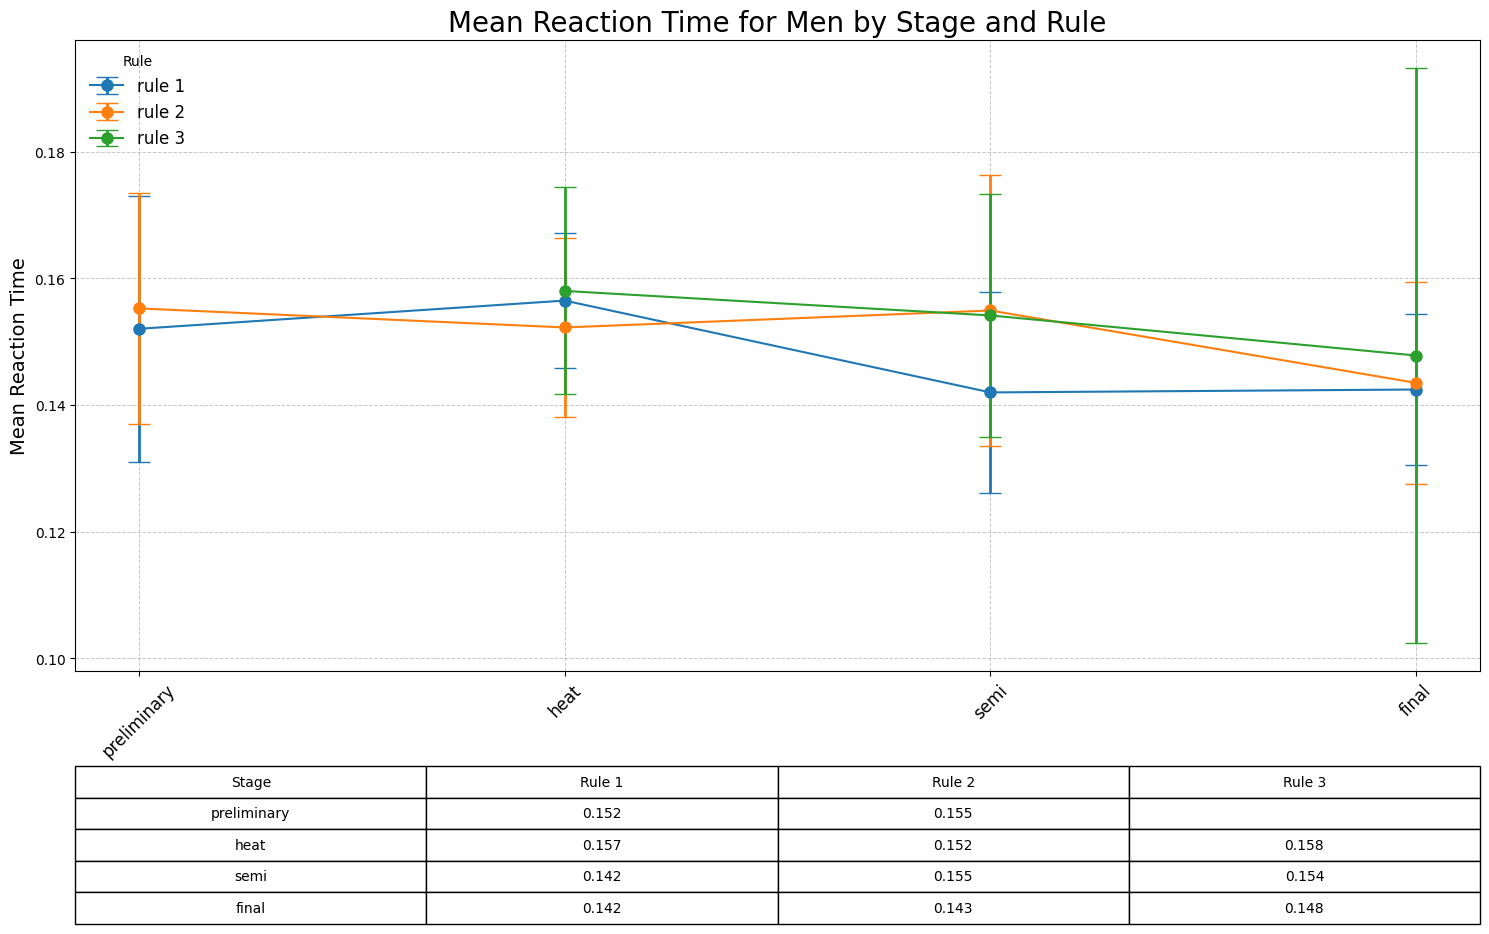

In [92]:
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Ensure 'stage' is ordered: preliminary, heat, semi, final
stage_order = ['preliminary', 'heat', 'semi', 'final']
stats_df_men['stage'] = pd.Categorical(stats_df_men['stage'], categories=stage_order, ordered=True)

# Sort by the custom order
stats_df_men = stats_df_men.sort_values(by='stage')

# Create the plot with error bars
fig, ax = plt.subplots(figsize=(15, 10))
for i, (rule, data) in enumerate(stats_df_men.groupby('rule')):
    ax.errorbar(
        x=data['stage'],
        y=data['mean_rt_men'],
        yerr=data['std_rt_men'],  # Use standard deviation for error bars
        label=rule,
        fmt='-o',  # Line with circular markers
        capsize=8,  # Larger caps on the error bars
        elinewidth=2,  # Thicker error bar lines
        markersize=8  # Larger markers
    )

# Add table with numbers outside the graph
table_data = []
table_headers = ['Stage'] + [f'Rule {i+1}' for i in range(len(stats_df_men["rule"].unique()))]

for stage in stage_order:
    row = [stage]
    for rule in stats_df_men['rule'].unique():
        value = stats_df_men.loc[(stats_df_men['stage'] == stage) & (stats_df_men['rule'] == rule), 'mean_rt_men']
        row.append(f"{value.iloc[0]:.3f}" if not value.empty else "")
    table_data.append(row)

# Create table below the plot
table = plt.table(
    cellText=table_data,
    colLabels=table_headers,
    cellLoc='center',
    loc='bottom',
    bbox=[0, -0.4, 1, 0.25]  # Adjust position and size
)

# Customize the plot
ax.set_ylabel('Mean Reaction Time', fontsize=14)
ax.set_title('Mean Reaction Time for Men by Stage and Rule', fontsize=20)
ax.legend(title='Rule', loc='upper left', frameon=False, fontsize=12)
ax.set_xticks(range(len(stage_order)))
ax.set_xticklabels(stage_order, rotation=45, fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Ensure background is white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Adjust layout to fit the table
plt.tight_layout()
plt.show()
